In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, 0]

In [3]:
X = np.array(X)
y = np.array(y)

In [4]:
X = X.astype('float32') / 255

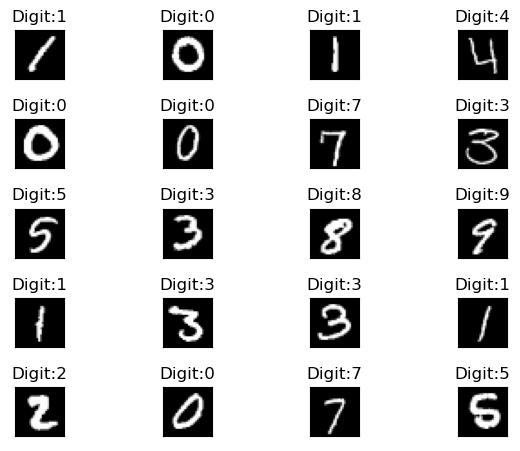

In [5]:
import matplotlib.pyplot as plt
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(X, y)

In [6]:
from sklearn.model_selection import train_test_split
X_dev, X_val, y_dev, y_val = train_test_split(X, y, test_size=0.03, shuffle=True, random_state=2022)

X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

from tensorflow.keras.utils import to_categorical
y_dev = pd.get_dummies(y_dev).values
y_val = pd.get_dummies(y_val).values

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten

# Instantiate an empty sequential model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh',  input_shape = (28,28,1), padding =  'same' ))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding =  'valid' ))

# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh', padding =  'valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding =  'valid' ))

# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh', padding =  'valid' ))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))

# FC7 Output layer with softmax activation
model.add(Dense(units = 10, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

2023-02-22 17:46:02.438570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-22 17:46:02.438619: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


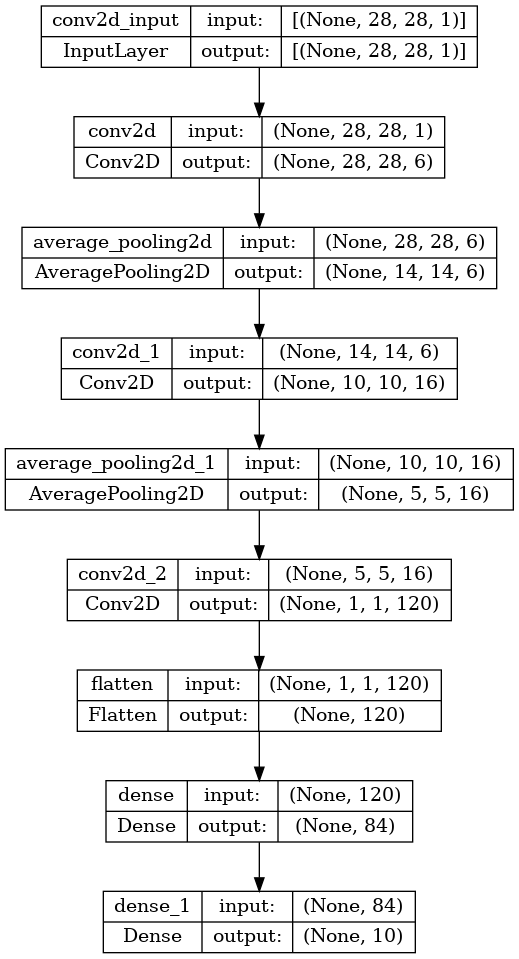

In [8]:
from tensorflow.keras.utils import plot_model 
plot_model(model, show_shapes=True)

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=5e-4))
model.fit(X_dev, y_dev, epochs=50, batch_size=64)

Epoch 1/50
637/637 [==============================] - 14s 20ms/step - loss: 0.4231 - accuracy: 0.8797
Epoch 2/50
637/637 [==============================] - 13s 20ms/step - loss: 0.1748 - accuracy: 0.9465
Epoch 3/50
637/637 [==============================] - 13s 20ms/step - loss: 0.1137 - accuracy: 0.9661
Epoch 4/50
637/637 [==============================] - 13s 21ms/step - loss: 0.0841 - accuracy: 0.9745
Epoch 5/50
637/637 [==============================] - 13s 20ms/step - loss: 0.0646 - accuracy: 0.9802
Epoch 6/50
637/637 [==============================] - 13s 20ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 7/50
637/637 [==============================] - 13s 21ms/step - loss: 0.0434 - accuracy: 0.9869
Epoch 8/50
637/637 [==============================] - 13s 20ms/step - loss: 0.0372 - accuracy: 0.9887
Epoch 9/50
637/637 [==============================] - 14s 21ms/step - loss: 0.0315 - accuracy: 0.9909
Epoch 10/50
637/637 [==============================] - 13s 21ms/step - loss: 0.028

In [10]:
performance = model.evaluate(X_val, y_val, batch_size=32)
dict(zip(model.metrics_names, performance))

40/40 [==============================] - 0s 6ms/step - loss: 0.1237 - accuracy: 0.9754


{'loss': 0.12369194626808167, 'accuracy': 0.9753968119621277}

In [11]:
X_test = np.array(pd.read_csv('/kaggle/input/digit-recognizer/test.csv'))/255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

y_test = model.predict(X_test)
y_test

875/875 [==============================] - 5s 5ms/step


array([[1.6029456e-09, 1.3179390e-12, 9.9999994e-01, ..., 1.2633223e-12,
        3.8025685e-10, 3.9688416e-13],
       [9.9999791e-01, 9.2069677e-12, 7.1929048e-07, ..., 6.0111333e-11,
        4.2132222e-09, 8.5365603e-10],
       [5.6629124e-12, 1.9508654e-10, 2.5297556e-10, ..., 3.4264578e-09,
        2.0099769e-06, 9.9999660e-01],
       ...,
       [2.2491227e-13, 4.8173486e-11, 3.1159654e-12, ..., 4.9164024e-11,
        1.7283393e-11, 3.2510869e-11],
       [8.9837444e-09, 9.4886703e-09, 2.6553009e-09, ..., 8.4374797e-06,
        2.4805695e-06, 9.9773860e-01],
       [5.9854871e-10, 1.9713677e-12, 9.9999994e-01, ..., 5.7956282e-13,
        3.3732289e-10, 1.5271619e-10]], dtype=float32)

In [12]:
y_test = np.argmax(y_test, axis=1)
y_test

array([2, 0, 9, ..., 3, 9, 2])

In [13]:
test_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
test_sub["Label"] = y_test
test_sub.to_csv("/kaggle/working/submission.csv", index=False)